In [4]:
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print('Notebook run using keras:', keras.__version__)

2023-08-24 19:07:54.683936: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-24 19:07:54.726090: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-24 19:07:55.264508: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Notebook run using keras: 2.13.1


In [5]:
inet_model = inc_net.InceptionV3()

2023-08-24 19:07:56.173342: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [6]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

1/1 [==============================] - 1s 918ms/step
('n02133161', 'American_black_bear', 0.637279)
('n02105056', 'groenendael', 0.031802833)
('n02104365', 'schipperke', 0.029921424)
('n01883070', 'wombat', 0.028507374)
('n01877812', 'wallaby', 0.025098754)


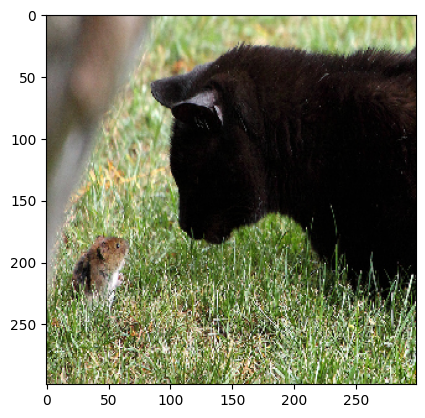

In [7]:
images = transform_img_fn([os.path.join('data','cat_mouse.jpg')])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

In [8]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

/home/dhshin/anaconda3/envs/lime/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
explainer = lime_image.LimeImageExplainer()

In [10]:
from lime.wrappers.scikit_image import SegmentationAlgorithm

felzenszwalb = SegmentationAlgorithm('felzenszwalb', scale=100, sigma=0.5, min_size=50)

In [11]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0].astype('double'), inet_model.predict, top_labels=5, hide_color=0, num_samples=1000, segmentation_fn = felzenszwalb)

  0%|                                                                                   | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 191ms/step


  1%|▋                                                                         | 10/1000 [00:00<00:33, 29.76it/s]

1/1 [==============================] - 0s 113ms/step


  2%|█▍                                                                        | 20/1000 [00:00<00:28, 34.55it/s]

1/1 [==============================] - 0s 118ms/step


  3%|██▏                                                                       | 30/1000 [00:00<00:26, 36.10it/s]

1/1 [==============================] - 0s 110ms/step


  4%|██▉                                                                       | 40/1000 [00:01<00:25, 37.35it/s]

1/1 [==============================] - 0s 111ms/step


  5%|███▋                                                                      | 50/1000 [00:01<00:24, 38.07it/s]

1/1 [==============================] - 0s 112ms/step


  6%|████▍                                                                     | 60/1000 [00:01<00:24, 38.38it/s]

1/1 [==============================] - 0s 108ms/step


  7%|█████▏                                                                    | 70/1000 [00:01<00:23, 38.79it/s]

1/1 [==============================] - 0s 112ms/step


  8%|█████▉                                                                    | 80/1000 [00:02<00:23, 38.66it/s]

1/1 [==============================] - 0s 109ms/step


  9%|██████▋                                                                   | 90/1000 [00:02<00:23, 38.99it/s]

1/1 [==============================] - 0s 107ms/step


 10%|███████▎                                                                 | 100/1000 [00:02<00:22, 39.41it/s]

1/1 [==============================] - 0s 108ms/step


 11%|████████                                                                 | 110/1000 [00:02<00:22, 39.44it/s]

1/1 [==============================] - 0s 110ms/step


 12%|████████▊                                                                | 120/1000 [00:03<00:22, 39.36it/s]

1/1 [==============================] - 0s 110ms/step


 13%|█████████▍                                                               | 130/1000 [00:03<00:22, 39.44it/s]

1/1 [==============================] - 0s 108ms/step


 14%|██████████▏                                                              | 140/1000 [00:03<00:21, 39.75it/s]

1/1 [==============================] - 0s 109ms/step


 15%|██████████▉                                                              | 150/1000 [00:03<00:21, 39.88it/s]

1/1 [==============================] - 0s 120ms/step


 16%|███████████▋                                                             | 160/1000 [00:04<00:21, 39.09it/s]

1/1 [==============================] - 0s 113ms/step


 17%|████████████▍                                                            | 170/1000 [00:04<00:21, 38.75it/s]

1/1 [==============================] - 0s 112ms/step


 18%|█████████████▏                                                           | 180/1000 [00:04<00:21, 38.92it/s]

1/1 [==============================] - 0s 113ms/step


 19%|█████████████▊                                                           | 190/1000 [00:04<00:20, 38.94it/s]

1/1 [==============================] - 0s 110ms/step


 20%|██████████████▌                                                          | 200/1000 [00:05<00:20, 39.04it/s]

1/1 [==============================] - 0s 114ms/step


 21%|███████████████▎                                                         | 210/1000 [00:05<00:20, 39.00it/s]

1/1 [==============================] - 0s 110ms/step


 22%|████████████████                                                         | 220/1000 [00:05<00:19, 39.15it/s]

1/1 [==============================] - 0s 111ms/step


 23%|████████████████▊                                                        | 230/1000 [00:05<00:19, 39.22it/s]

1/1 [==============================] - 0s 110ms/step


 24%|█████████████████▌                                                       | 240/1000 [00:06<00:19, 39.12it/s]

1/1 [==============================] - 0s 110ms/step


 25%|██████████████████▎                                                      | 250/1000 [00:06<00:19, 39.35it/s]

1/1 [==============================] - 0s 125ms/step


 26%|██████████████████▉                                                      | 260/1000 [00:06<00:19, 38.60it/s]

1/1 [==============================] - 0s 168ms/step


 27%|███████████████████▋                                                     | 270/1000 [00:07<00:20, 36.24it/s]

1/1 [==============================] - 0s 110ms/step


 28%|████████████████████▍                                                    | 280/1000 [00:07<00:19, 37.13it/s]

1/1 [==============================] - 0s 111ms/step


 29%|█████████████████████▏                                                   | 290/1000 [00:07<00:18, 37.80it/s]

1/1 [==============================] - 0s 110ms/step


 30%|█████████████████████▉                                                   | 300/1000 [00:07<00:18, 38.21it/s]

1/1 [==============================] - 0s 110ms/step


 31%|██████████████████████▋                                                  | 310/1000 [00:08<00:17, 38.61it/s]

1/1 [==============================] - 0s 120ms/step


 32%|███████████████████████▎                                                 | 320/1000 [00:08<00:17, 38.08it/s]

1/1 [==============================] - 0s 111ms/step


 33%|████████████████████████                                                 | 330/1000 [00:08<00:17, 38.41it/s]

1/1 [==============================] - 0s 111ms/step


 34%|████████████████████████▊                                                | 340/1000 [00:08<00:17, 38.53it/s]

1/1 [==============================] - 0s 108ms/step


 35%|█████████████████████████▌                                               | 350/1000 [00:09<00:16, 38.88it/s]

1/1 [==============================] - 0s 113ms/step


 36%|██████████████████████████▎                                              | 360/1000 [00:09<00:16, 38.93it/s]

1/1 [==============================] - 0s 111ms/step


 37%|███████████████████████████                                              | 370/1000 [00:09<00:16, 39.10it/s]

1/1 [==============================] - 0s 110ms/step


 38%|███████████████████████████▋                                             | 380/1000 [00:09<00:15, 39.33it/s]

1/1 [==============================] - 0s 108ms/step


 39%|████████████████████████████▍                                            | 390/1000 [00:10<00:15, 39.49it/s]

1/1 [==============================] - 0s 110ms/step


 40%|█████████████████████████████▏                                           | 400/1000 [00:10<00:15, 39.20it/s]

1/1 [==============================] - 0s 111ms/step


 41%|█████████████████████████████▉                                           | 410/1000 [00:10<00:15, 39.24it/s]

1/1 [==============================] - 0s 109ms/step


 42%|██████████████████████████████▋                                          | 420/1000 [00:10<00:14, 39.47it/s]

1/1 [==============================] - 0s 120ms/step


 43%|███████████████████████████████▍                                         | 430/1000 [00:11<00:14, 39.13it/s]

1/1 [==============================] - 0s 111ms/step


 44%|████████████████████████████████                                         | 440/1000 [00:11<00:14, 39.17it/s]

1/1 [==============================] - 0s 114ms/step


 45%|████████████████████████████████▊                                        | 450/1000 [00:11<00:14, 39.09it/s]

1/1 [==============================] - 0s 112ms/step


 46%|█████████████████████████████████▌                                       | 460/1000 [00:11<00:13, 39.23it/s]

1/1 [==============================] - 0s 185ms/step


 47%|██████████████████████████████████▎                                      | 470/1000 [00:12<00:14, 36.07it/s]

1/1 [==============================] - 0s 129ms/step


 48%|███████████████████████████████████                                      | 480/1000 [00:12<00:14, 36.08it/s]

1/1 [==============================] - 0s 115ms/step


 49%|███████████████████████████████████▊                                     | 490/1000 [00:12<00:13, 36.78it/s]

1/1 [==============================] - 0s 120ms/step


 50%|████████████████████████████████████▌                                    | 500/1000 [00:13<00:13, 36.98it/s]

1/1 [==============================] - 0s 116ms/step


 51%|█████████████████████████████████████▏                                   | 510/1000 [00:13<00:13, 37.29it/s]

1/1 [==============================] - 0s 118ms/step


 52%|█████████████████████████████████████▉                                   | 520/1000 [00:13<00:12, 37.16it/s]

1/1 [==============================] - 0s 113ms/step


 53%|██████████████████████████████████████▋                                  | 530/1000 [00:13<00:12, 37.32it/s]

1/1 [==============================] - 0s 119ms/step


 54%|███████████████████████████████████████▍                                 | 540/1000 [00:14<00:12, 37.31it/s]

1/1 [==============================] - 0s 128ms/step


 55%|████████████████████████████████████████▏                                | 550/1000 [00:14<00:12, 37.05it/s]

1/1 [==============================] - 0s 128ms/step


 56%|████████████████████████████████████████▉                                | 560/1000 [00:14<00:11, 36.74it/s]

1/1 [==============================] - 0s 127ms/step


 57%|█████████████████████████████████████████▌                               | 570/1000 [00:14<00:11, 36.59it/s]

1/1 [==============================] - 0s 116ms/step


 58%|██████████████████████████████████████████▎                              | 580/1000 [00:15<00:11, 37.14it/s]

1/1 [==============================] - 0s 127ms/step


 59%|███████████████████████████████████████████                              | 590/1000 [00:15<00:11, 37.05it/s]

1/1 [==============================] - 0s 130ms/step


 60%|███████████████████████████████████████████▊                             | 600/1000 [00:15<00:11, 36.09it/s]

1/1 [==============================] - 0s 116ms/step


 61%|████████████████████████████████████████████▌                            | 610/1000 [00:16<00:10, 36.54it/s]

1/1 [==============================] - 0s 118ms/step


 62%|█████████████████████████████████████████████▎                           | 620/1000 [00:16<00:10, 36.91it/s]

1/1 [==============================] - 0s 112ms/step


 63%|█████████████████████████████████████████████▉                           | 630/1000 [00:16<00:09, 37.45it/s]

1/1 [==============================] - 0s 119ms/step


 64%|██████████████████████████████████████████████▋                          | 640/1000 [00:16<00:09, 37.53it/s]

1/1 [==============================] - 0s 113ms/step


 65%|███████████████████████████████████████████████▍                         | 650/1000 [00:17<00:09, 38.09it/s]

1/1 [==============================] - 0s 118ms/step


 66%|████████████████████████████████████████████████▏                        | 660/1000 [00:17<00:08, 38.13it/s]

1/1 [==============================] - 0s 118ms/step


 67%|████████████████████████████████████████████████▉                        | 670/1000 [00:17<00:08, 38.10it/s]

1/1 [==============================] - 0s 116ms/step


 68%|█████████████████████████████████████████████████▋                       | 680/1000 [00:17<00:08, 38.05it/s]

1/1 [==============================] - 0s 111ms/step


 69%|██████████████████████████████████████████████████▎                      | 690/1000 [00:18<00:08, 38.42it/s]

1/1 [==============================] - 0s 113ms/step


 70%|███████████████████████████████████████████████████                      | 700/1000 [00:18<00:07, 38.58it/s]

1/1 [==============================] - 0s 121ms/step


 71%|███████████████████████████████████████████████████▊                     | 710/1000 [00:18<00:07, 38.35it/s]

1/1 [==============================] - 0s 109ms/step


 72%|████████████████████████████████████████████████████▌                    | 720/1000 [00:18<00:07, 38.72it/s]

1/1 [==============================] - 0s 116ms/step


 73%|█████████████████████████████████████████████████████▎                   | 730/1000 [00:19<00:07, 38.38it/s]

1/1 [==============================] - 0s 111ms/step


 74%|██████████████████████████████████████████████████████                   | 740/1000 [00:19<00:06, 38.61it/s]

1/1 [==============================] - 0s 113ms/step


 75%|██████████████████████████████████████████████████████▊                  | 750/1000 [00:19<00:06, 38.53it/s]

1/1 [==============================] - 0s 118ms/step


 76%|███████████████████████████████████████████████████████▍                 | 760/1000 [00:19<00:06, 38.42it/s]

1/1 [==============================] - 0s 110ms/step


 77%|████████████████████████████████████████████████████████▏                | 770/1000 [00:20<00:05, 38.56it/s]

1/1 [==============================] - 0s 110ms/step


 78%|████████████████████████████████████████████████████████▉                | 780/1000 [00:20<00:05, 38.59it/s]

1/1 [==============================] - 0s 111ms/step


 79%|█████████████████████████████████████████████████████████▋               | 790/1000 [00:20<00:05, 38.32it/s]

1/1 [==============================] - 0s 119ms/step


 80%|██████████████████████████████████████████████████████████▍              | 800/1000 [00:20<00:05, 38.59it/s]

1/1 [==============================] - 0s 130ms/step


 81%|███████████████████████████████████████████████████████████▏             | 810/1000 [00:21<00:05, 37.22it/s]

1/1 [==============================] - 0s 108ms/step


 82%|███████████████████████████████████████████████████████████▊             | 820/1000 [00:21<00:04, 38.23it/s]

1/1 [==============================] - 0s 113ms/step


 83%|████████████████████████████████████████████████████████████▌            | 830/1000 [00:21<00:04, 38.90it/s]

1/1 [==============================] - 0s 110ms/step


 84%|█████████████████████████████████████████████████████████████▎           | 840/1000 [00:21<00:04, 39.49it/s]

1/1 [==============================] - 0s 137ms/step


 85%|██████████████████████████████████████████████████████████████           | 850/1000 [00:22<00:03, 38.85it/s]

1/1 [==============================] - 0s 118ms/step


 86%|██████████████████████████████████████████████████████████████▊          | 860/1000 [00:22<00:03, 39.11it/s]

1/1 [==============================] - 0s 119ms/step


 87%|███████████████████████████████████████████████████████████████▌         | 870/1000 [00:22<00:03, 39.32it/s]

1/1 [==============================] - 0s 121ms/step


 88%|████████████████████████████████████████████████████████████████▏        | 880/1000 [00:23<00:03, 39.22it/s]

1/1 [==============================] - 0s 112ms/step


 89%|████████████████████████████████████████████████████████████████▉        | 890/1000 [00:23<00:02, 39.53it/s]

1/1 [==============================] - 0s 114ms/step


 90%|█████████████████████████████████████████████████████████████████▋       | 900/1000 [00:23<00:02, 39.83it/s]

1/1 [==============================] - 0s 114ms/step


 91%|██████████████████████████████████████████████████████████████████▍      | 910/1000 [00:23<00:02, 40.15it/s]

1/1 [==============================] - 0s 112ms/step


 92%|███████████████████████████████████████████████████████████████████▏     | 920/1000 [00:23<00:01, 40.46it/s]

1/1 [==============================] - 0s 109ms/step


 93%|███████████████████████████████████████████████████████████████████▉     | 930/1000 [00:24<00:01, 40.85it/s]

1/1 [==============================] - 0s 117ms/step


 94%|████████████████████████████████████████████████████████████████████▌    | 940/1000 [00:24<00:01, 40.65it/s]

1/1 [==============================] - 0s 109ms/step


 95%|█████████████████████████████████████████████████████████████████████▎   | 950/1000 [00:24<00:01, 40.91it/s]

1/1 [==============================] - 0s 110ms/step


 96%|██████████████████████████████████████████████████████████████████████   | 960/1000 [00:24<00:00, 40.76it/s]

1/1 [==============================] - 0s 114ms/step


 97%|██████████████████████████████████████████████████████████████████████▊  | 970/1000 [00:25<00:00, 40.89it/s]

1/1 [==============================] - 0s 117ms/step


 98%|███████████████████████████████████████████████████████████████████████▌ | 980/1000 [00:25<00:00, 40.71it/s]

1/1 [==============================] - 0s 115ms/step


 99%|████████████████████████████████████████████████████████████████████████▎| 990/1000 [00:25<00:00, 40.43it/s]

1/1 [==============================] - 0s 126ms/step


100%|████████████████████████████████████████████████████████████████████████| 1000/1000 [00:25<00:00, 38.52it/s]


CPU times: user 7min 13s, sys: 1min 3s, total: 8min 16s
Wall time: 26.3 s


In [12]:
from skimage.segmentation import mark_boundaries

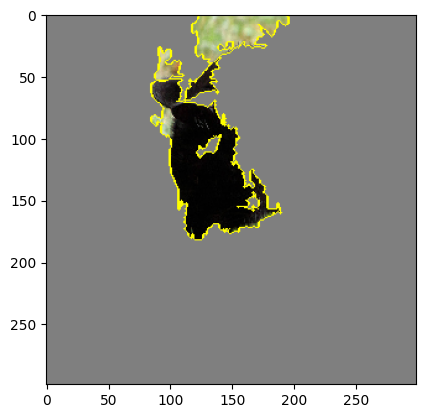

In [24]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

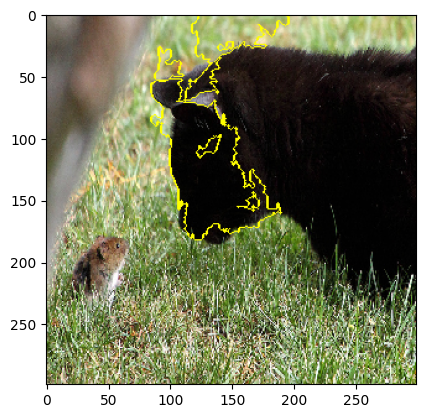

In [14]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

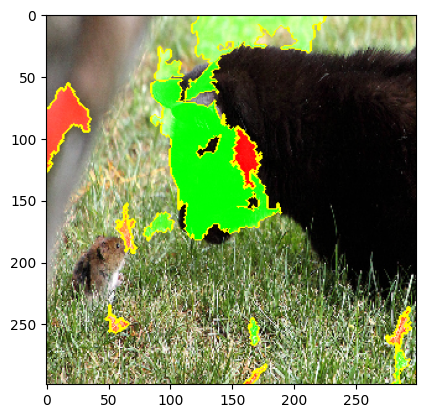

In [15]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=20, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

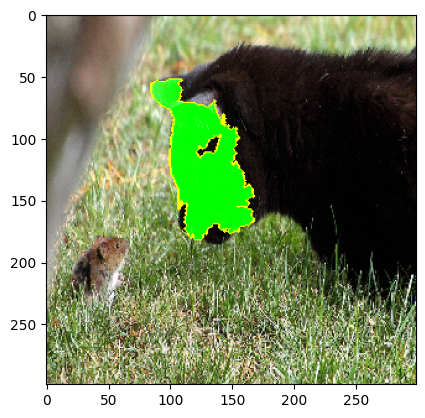

In [16]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

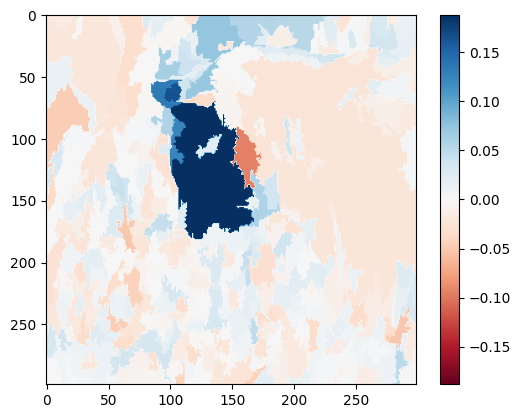

In [17]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

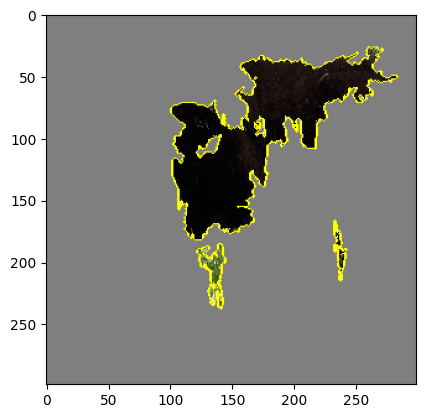

In [18]:
temp, mask = explanation.get_image_and_mask(106, positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

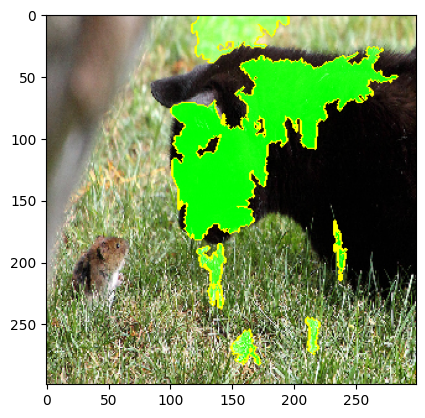

In [19]:
temp, mask = explanation.get_image_and_mask(106, positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


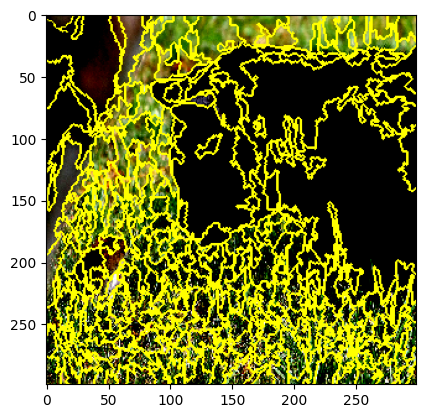

In [20]:
plt.imshow(mark_boundaries(images[0], explanation.segments))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


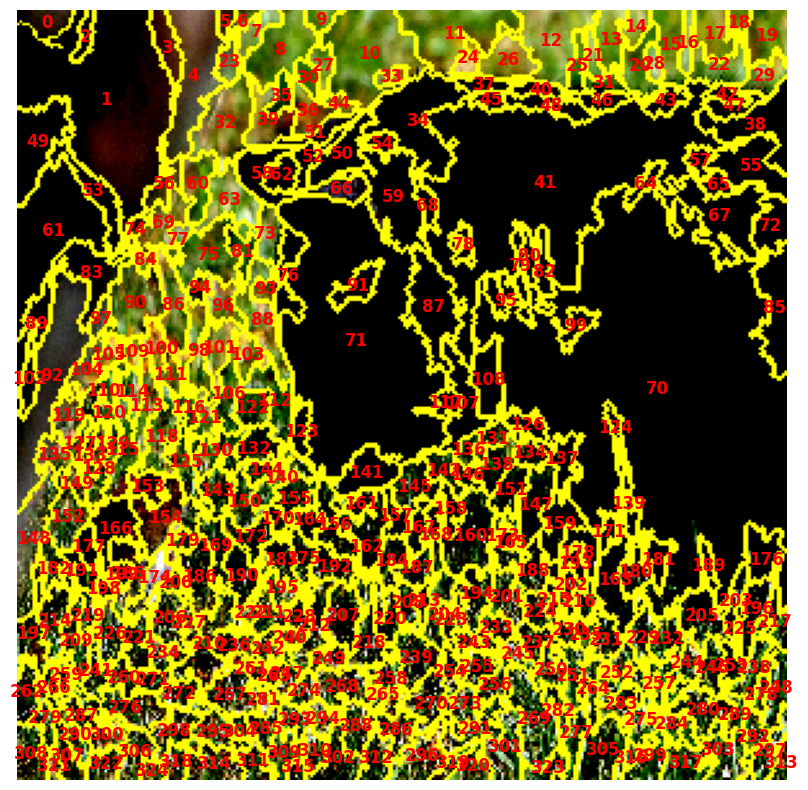

In [21]:
from scipy.ndimage import center_of_mass

segments = explanation.segments

boundary_marked_image = mark_boundaries(images[0], segments)

plt.figure(figsize=(10,10))
plt.imshow(boundary_marked_image)

unique_segments = np.unique(segments)
for seg_id in unique_segments:
    y, x = center_of_mass(segments == seg_id)
    plt.text(x, y, str(seg_id), color='red', fontsize=12, ha='center', va='center', weight='bold')

plt.axis('off')
plt.show()